<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center"> Bike Sharing Demand</h3>
</div>

<h1 align="center">Yasin Azhdari</h1>

<img src = "https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" width=80%>

## Importing the libraries

In [231]:
%matplotlib inline
import numpy   as np
import pandas  as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load and Prepare Data

In [232]:
BikeSharing_data=pd.read_csv("train.csv")
type(BikeSharing_data)

pandas.core.frame.DataFrame

## EDA

In [233]:
BikeSharing_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [234]:
BikeSharing_data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [235]:
BikeSharing_data.shape

(10886, 12)

In [236]:
BikeSharing_data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [237]:
BikeSharing_data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [238]:
BikeSharing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [239]:
# Extracting the number of unique values in each column of the dataset
BikeSharing_data.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
casual          309
registered      731
count           822
dtype: int64

In [240]:
BikeSharing_data['season'].    value_counts(normalize=True)*100

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64

In [241]:
BikeSharing_data['holiday'].   value_counts(normalize=True)*100

0    97.14312
1     2.85688
Name: holiday, dtype: float64

In [242]:
BikeSharing_data['workingday'].value_counts(normalize=True)*100

1    68.087452
0    31.912548
Name: workingday, dtype: float64

In [243]:
BikeSharing_data['weather'].   value_counts(normalize=True)*100

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64

In [244]:
# Check for missing values
BikeSharing_data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

So, there are no missing values in training dataset.

In [245]:
BikeSharing_data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [246]:
pd.crosstab( BikeSharing_data.workingday, BikeSharing_data.season, normalize =    "index" )

season,1,2,3,4
workingday,,,,
0,0.246978,0.241796,0.255613,0.255613
1,0.246627,0.255397,0.248921,0.249056


In [247]:
pd.crosstab( BikeSharing_data.weather, BikeSharing_data.season, normalize =    "index" )

season,1,2,3,4
weather,,,,
1,0.244577,0.250417,0.268354,0.236652
2,0.252294,0.249824,0.213126,0.284757
3,0.245634,0.260768,0.231665,0.261932
4,1.000000,0.000000,0.000000,0.000000


In [248]:
np.where(BikeSharing_data['weather']==4)[0]

array([5631])

In [249]:
BikeSharing_data.loc[[5631]]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


So, just one train data from extreme weather condition is available.

In [250]:
BikeSharing_data.groupby( 'season' )['count'].   mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

So, Bike sharing demands are more on Fall season.

In [251]:
BikeSharing_data.groupby( 'holiday' )['count'].   mean()

holiday
0    191.741655
1    185.877814
Name: count, dtype: float64

So, Bike sharing demands are more on working days.

In [252]:
BikeSharing_data.groupby( 'workingday' )['count'].mean()

workingday
0    188.506621
1    193.011873
Name: count, dtype: float64

It confirms the previous result, so demands are less on off days.

In [253]:
BikeSharing_data.groupby( 'weather' )['count'].   mean()

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

Bike sharing demands are more on nice weather conditions.

## Data Preprocessing

In [254]:
BikeSharing_data.datetime.astype('str')
Year =[]
Month=[]
Day  =[]
Hour =[]
for i in range(BikeSharing_data.shape[0]):
    Year.append (int(BikeSharing_data.datetime[i].split()[0][:4]))
    Month.append(int(BikeSharing_data.datetime[i].split()[0][5:7]))
    Day.  append(int(BikeSharing_data.datetime[i].split()[0][8:] ))
    Hour.append (int(BikeSharing_data.datetime[i].split()[1][:2]))
    

In [255]:
BikeSharing_data['Year'] = Year
BikeSharing_data['Month']=Month
BikeSharing_data['Day']  =  Day
BikeSharing_data['Hour'] = Hour

In [256]:
BikeSharing_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Day,Hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [257]:
BikeSharing_data=BikeSharing_data.reindex(columns=['season','Month','Day','Hour','holiday','workingday','weather','temp','atemp','humidity','windspeed','count'])

In [258]:
BikeSharing_data

,season,Month,Day,Hour,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,1,1,1,0,0,0,1,9.84,14.395,81,0.0000,16
1,1,1,1,1,0,0,1,9.02,13.635,80,0.0000,40
2,1,1,1,2,0,0,1,9.02,13.635,80,0.0000,32
3,1,1,1,3,0,0,1,9.84,14.395,75,0.0000,13
4,1,1,1,4,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,12,19,19,0,1,1,15.58,19.695,50,26.0027,336
10882,4,12,19,20,0,1,1,14.76,17.425,57,15.0013,241
10883,4,12,19,21,0,1,1,13.94,15.910,61,15.0013,168
10884,4,12,19,22,0,1,1,13.94,17.425,61,6.0032,129


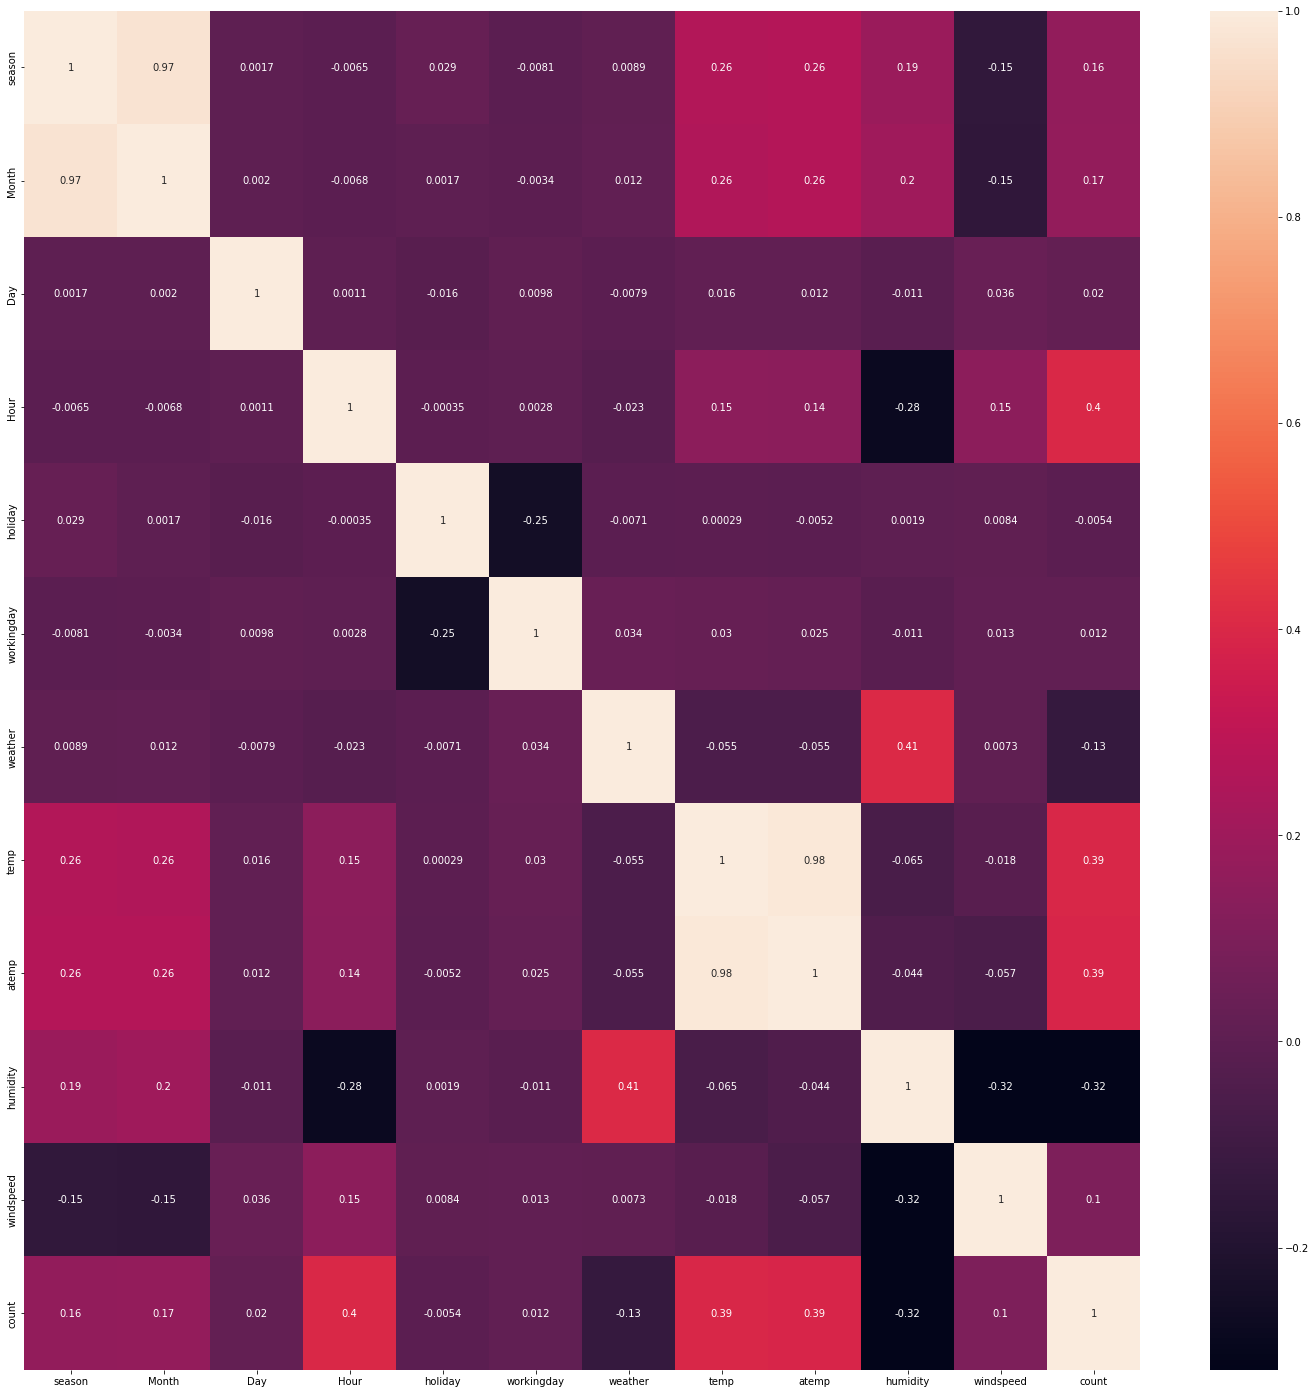

In [259]:
correlation = BikeSharing_data. corr()
plt.figure(figsize=(25,25))
sns.heatmap   (correlation,annot=True)

So, Hour, temp, atemp, humidity, and weather are the best features to choose.
additionally, temp and atemp are so closely correlated, so we will only keep temp, and will remove atemp. Similarly we will keep Month, and remove season, due to their high correlation.

In [260]:
BikeSharing_data_t=pd.read_csv("test.csv")
BikeSharing_data_t.datetime.astype('str')

Year =[]
Month=[]
Day  =[]
Hour =[]

for i in range(BikeSharing_data_t.shape[0]):
    Year.append (int(BikeSharing_data_t.datetime[i].split()[0][:4] ))
    Month.append(int(BikeSharing_data_t.datetime[i].split()[0][5:7]))
    Day.  append(int(BikeSharing_data_t.datetime[i].split()[0][8:] ))
    Hour.append (int(BikeSharing_data_t.datetime[i].split()[1][:2] ))
    
BikeSharing_data_t['Year'] = Year
BikeSharing_data_t['Month']=Month
BikeSharing_data_t['Day']  =  Day
BikeSharing_data_t['Hour'] = Hour

    

## Simple Linear reg.

In [261]:
X = BikeSharing_data.loc[:,['Hour' ]]   .values
y = BikeSharing_data.loc[:,['count']]   .values

In [262]:
X_t = BikeSharing_data_t.loc[:,['Hour']].values

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [264]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_test  = sc1.transform     (X_test)

In [265]:
X_t     = sc1.transform     (X_t)

In [266]:
from sklearn import metrics
from sklearn.linear_model  import LinearRegression

regressor_slr =  LinearRegression()
regressor_slr.fit(X_train, y_train)

LinearRegression()

In [267]:
predictions=regressor_slr.predict(X_test)

In [268]:
print('MAE_linear regression_test :'        , metrics.mean_absolute_error(y_test,  predictions)) 
print('MAE_linear regression_train:'        , metrics.mean_absolute_error(y_train, regressor_slr.predict(X_train))) 

MAE_linear regression_test : 128.14276625553347
MAE_linear regression_train: 123.96401879029919


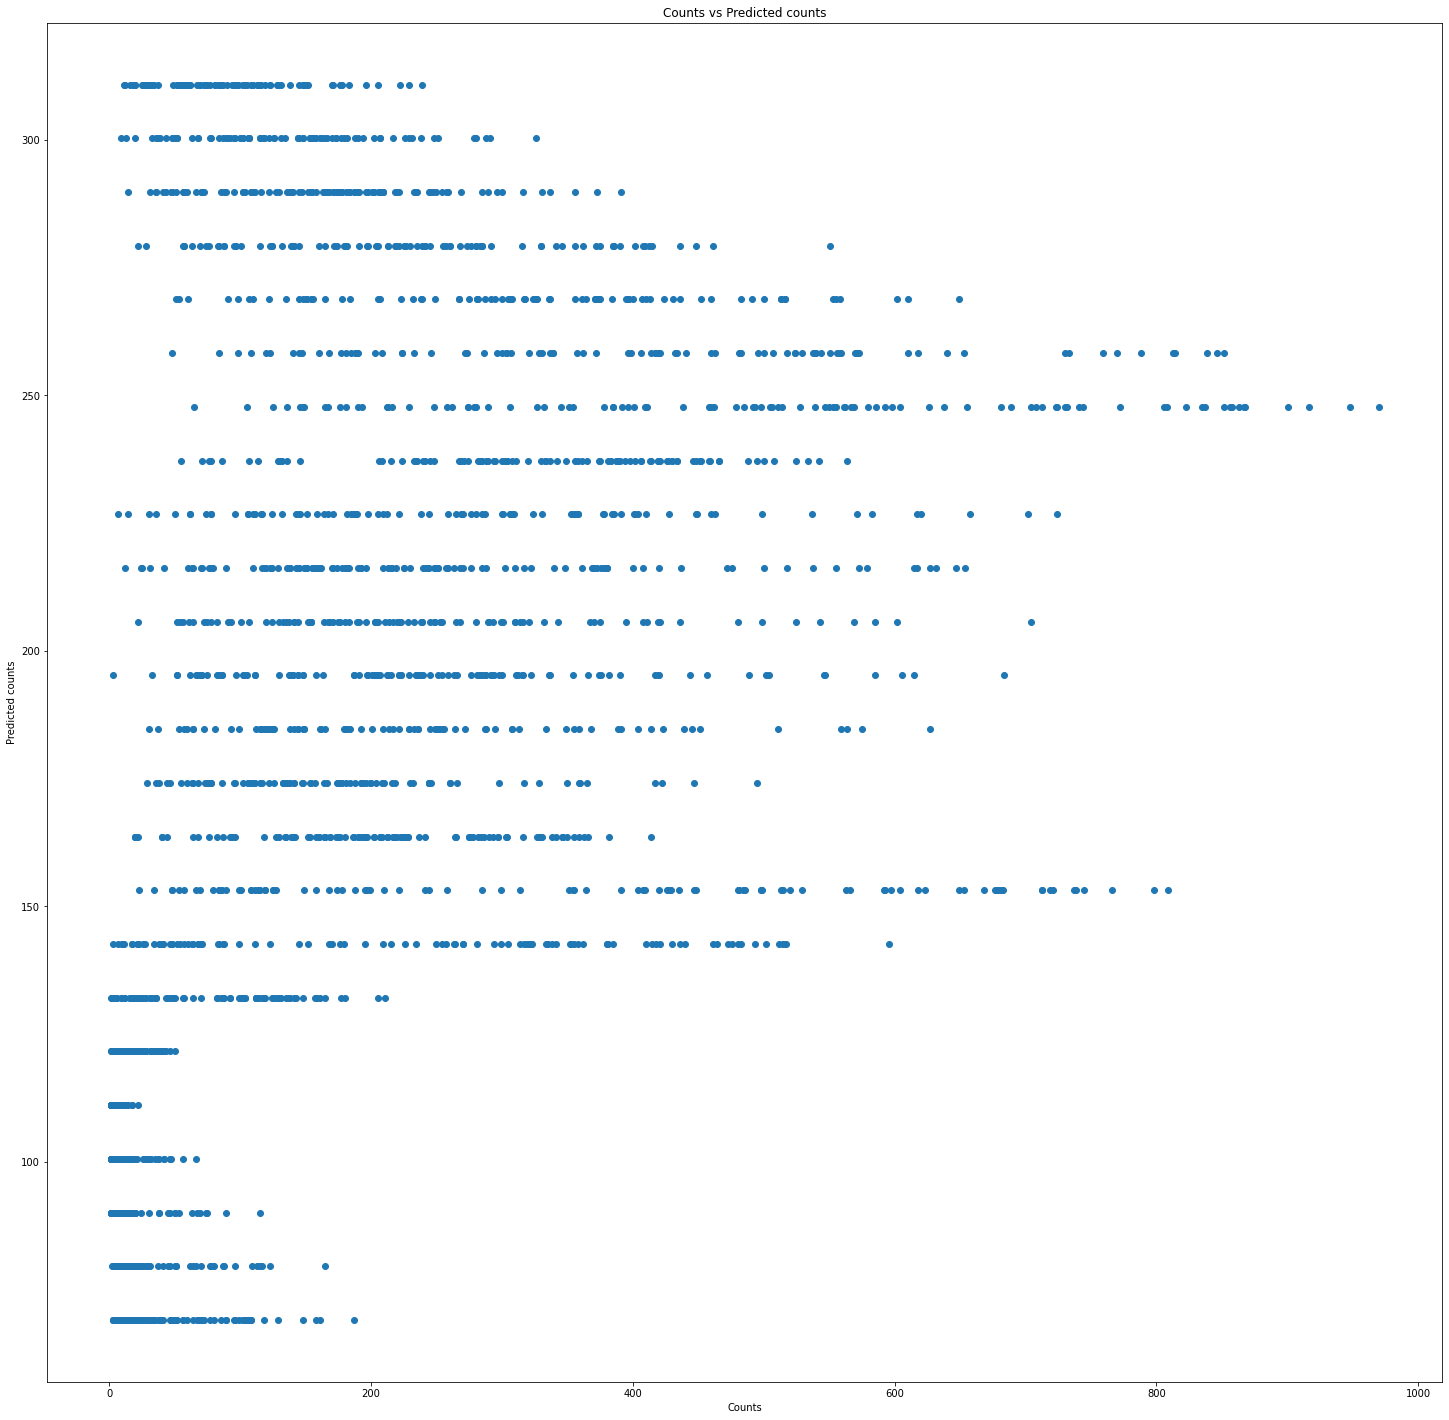

In [269]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [270]:
predictions_slr=regressor_slr.predict(X_t)


## Multiple Linear reg.

In [271]:
X = BikeSharing_data.loc[:,['Hour','temp','humidity','Month','weather','windspeed']]   .values
y = BikeSharing_data.loc[:,['count']].values
# X = BikeSharing_data.iloc[:, :-1]. values
# y = BikeSharing_data.iloc [:, -1]. values 

In [272]:
X_t = BikeSharing_data_t.loc[:,['Hour','temp','humidity','Month','weather','windspeed']].values

In [273]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [274]:
from sklearn.preprocessing import StandardScaler
sc2 = StandardScaler()
X_train = sc2.fit_transform(X_train)
X_test  = sc2.transform     (X_test)

In [275]:
X_t     = sc2.transform     (X_t)

In [276]:
from sklearn import metrics
from sklearn.linear_model  import LinearRegression

regressor_mlr =  LinearRegression()
regressor_mlr.fit(X_train, y_train)


LinearRegression()

In [277]:
predictions=regressor_mlr.predict(X_test)

In [278]:
print('MAE_linear regression_test :'        , metrics.mean_absolute_error(y_test, predictions))  
print('MAE_linear regression_train:'        , metrics.mean_absolute_error(y_train, regressor_mlr.predict(X_train))) 

MAE_linear regression_test : 111.55571029580858
MAE_linear regression_train: 107.7604375745154


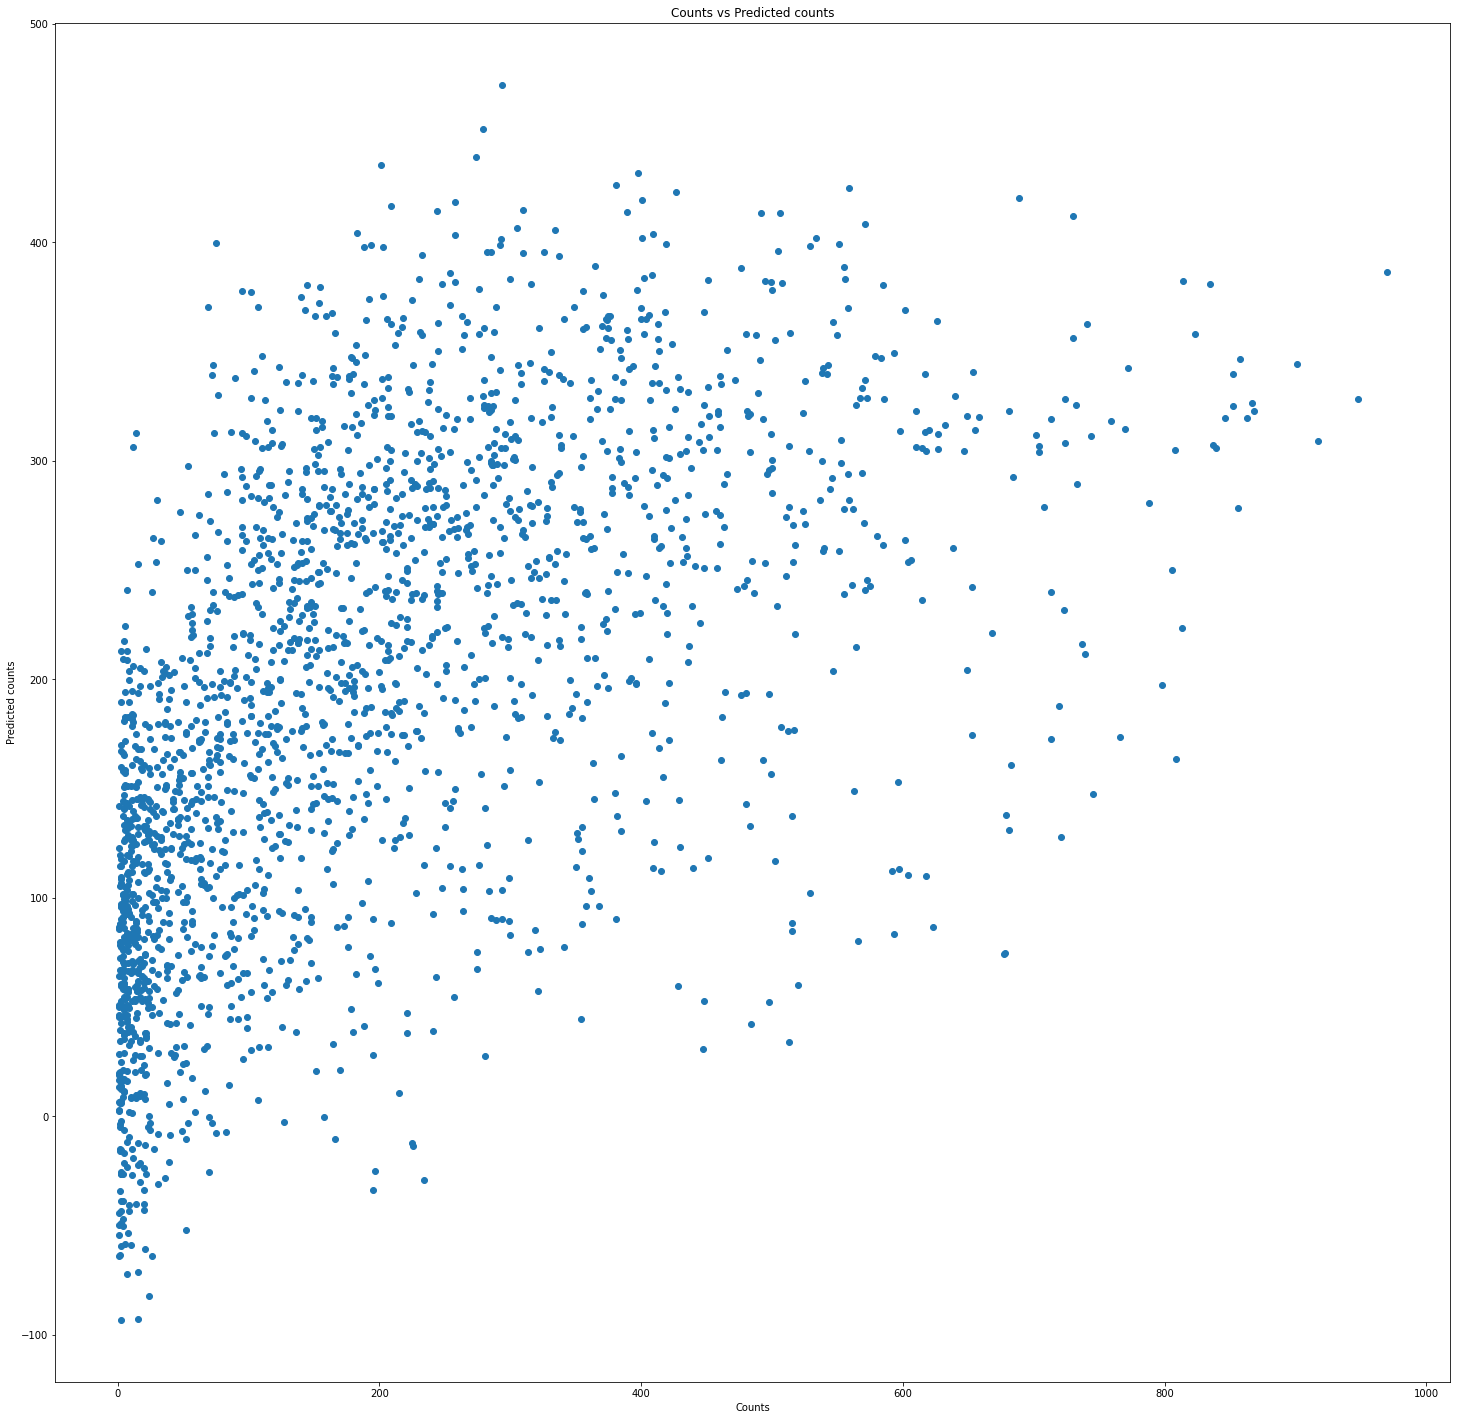

In [279]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [280]:
predictions_mlr=regressor_mlr.predict(X_t)

## KNN

In [281]:
from sklearn.neighbors import KNeighborsClassifier

In [282]:
error_rate = []

for i in range(1,25):
    knn =    KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Text(0, 0.5, 'Error Rate')

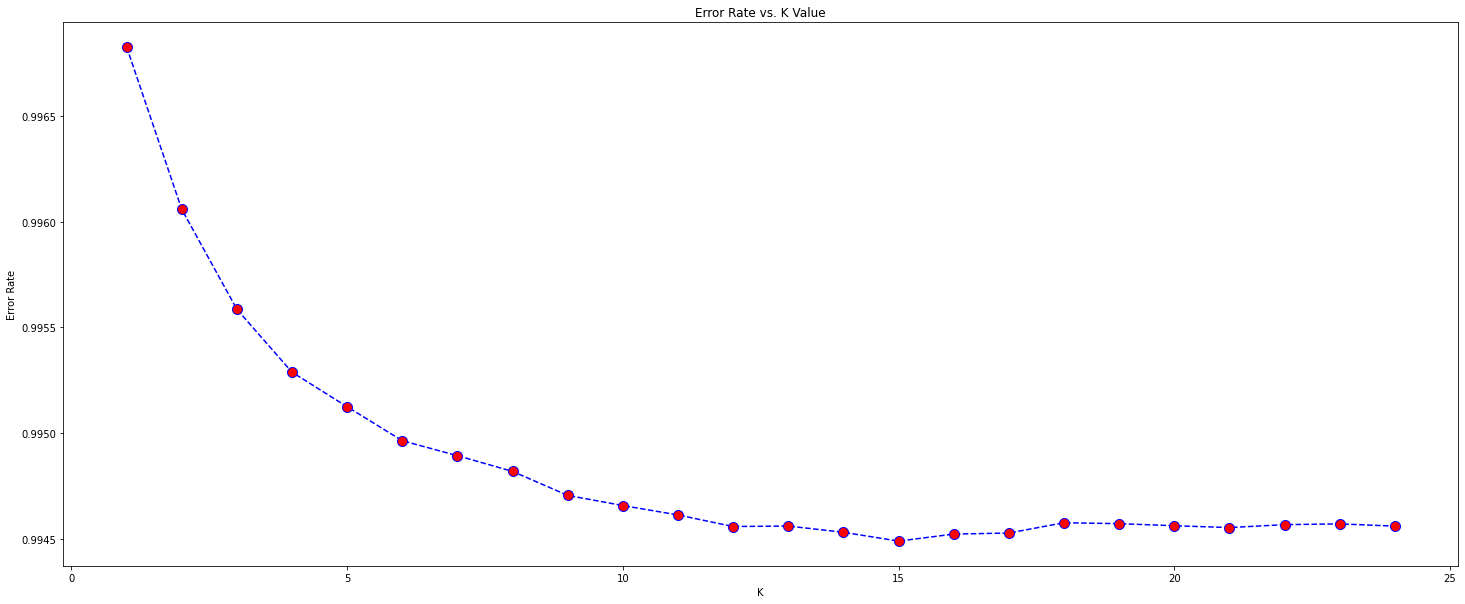

In [283]:
plt.figure(figsize=(25,10))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [284]:
knn = KNeighborsClassifier(n_neighbors = 10)

In [285]:
#y_train=np.ravel(y_train)

In [286]:
knn.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [287]:
predictions = knn.predict(X_test)

In [288]:
print('MAE_knn_test :'        , metrics.mean_absolute_error(y_test, predictions)) 
print('MAE_knn_train:'        , metrics.mean_absolute_error(y_train, knn.predict(X_train))) 

MAE_knn_test : 120.44811753902663
MAE_knn_train: 110.14733578318787


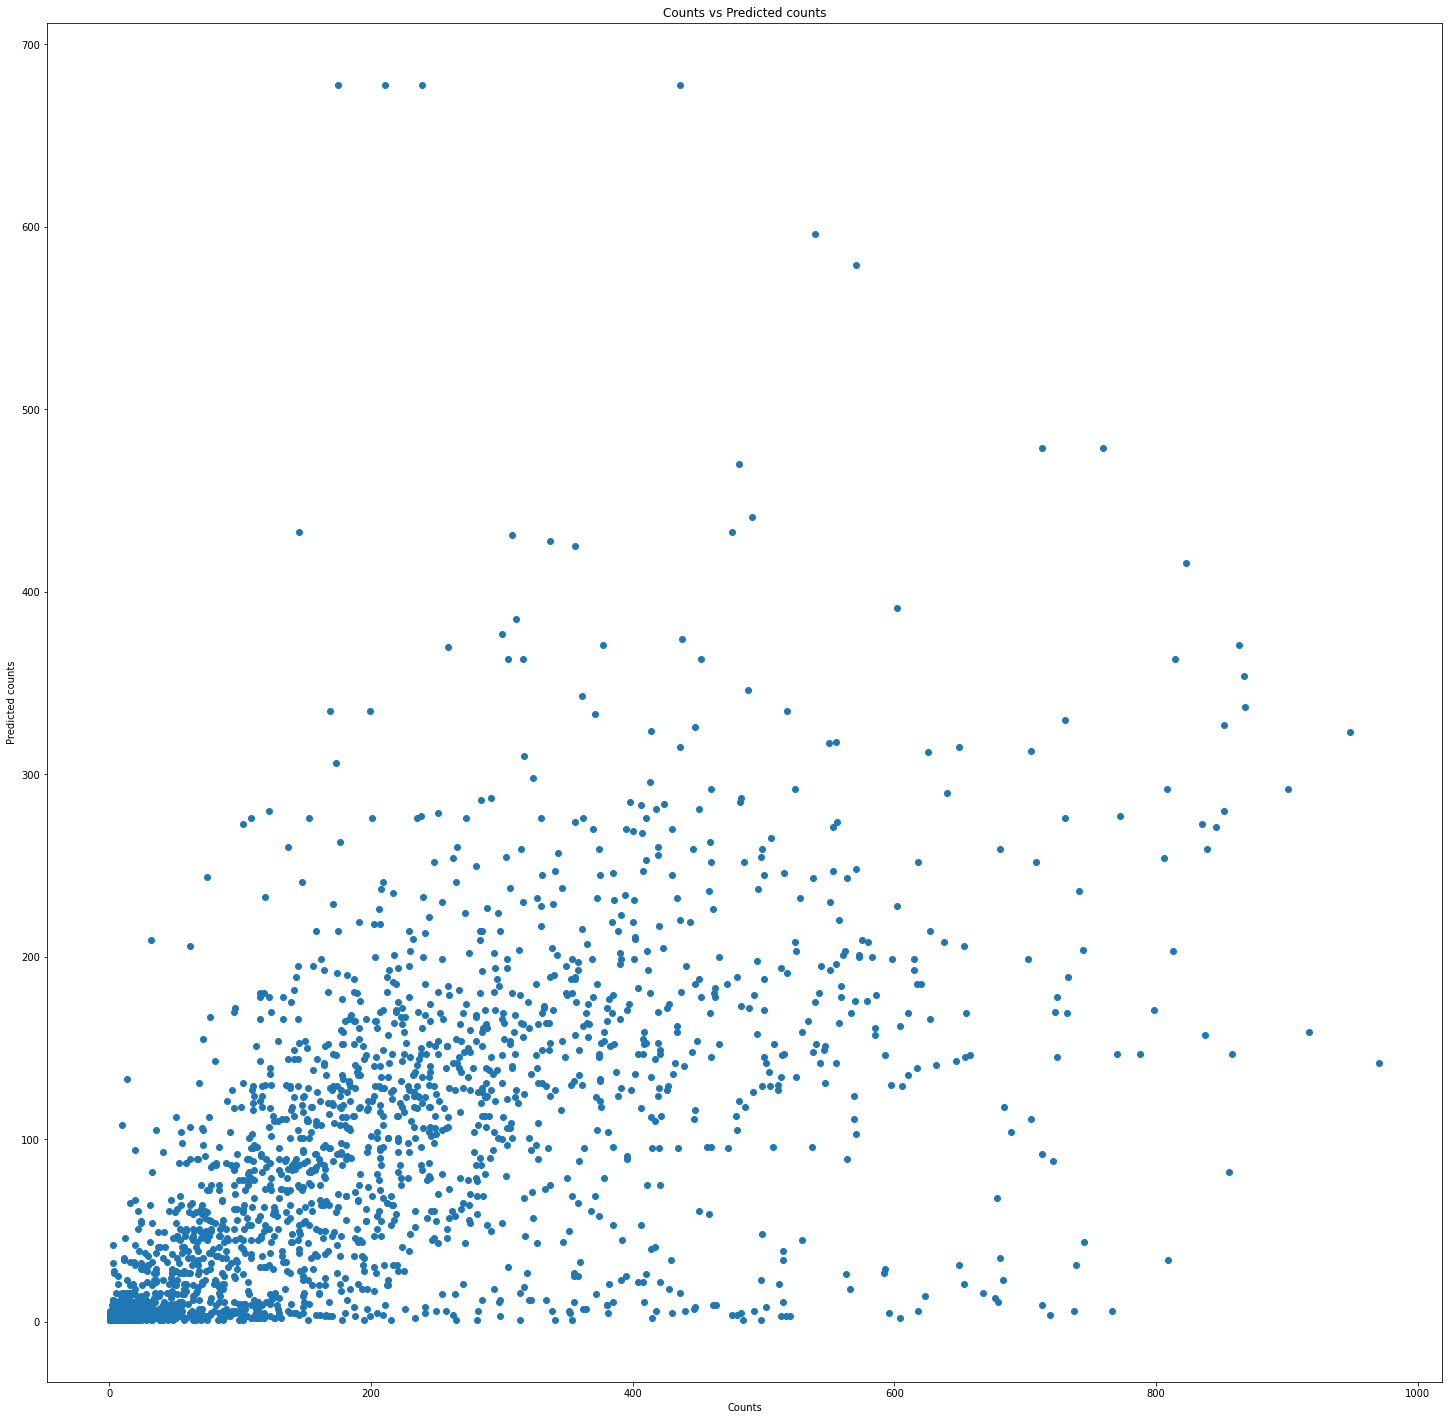

In [289]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [290]:
predictions_knn=knn.predict(X_t)

## Decision Tree

In [291]:
from sklearn.tree       import DecisionTreeRegressor
regressor_dtr=DecisionTreeRegressor(random_state = 0)
regressor_dtr.                  fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [292]:
predictions = regressor_dtr.predict(X_test)

In [293]:
print('MAE_dtr_test :'        , metrics.mean_absolute_error(y_test, predictions))  
print('MAE_dtr_train:'        , metrics.mean_absolute_error(y_train, regressor_dtr.predict(X_train))) 

MAE_dtr_test : 87.92470156106519
MAE_dtr_train: 0.7397795130914102


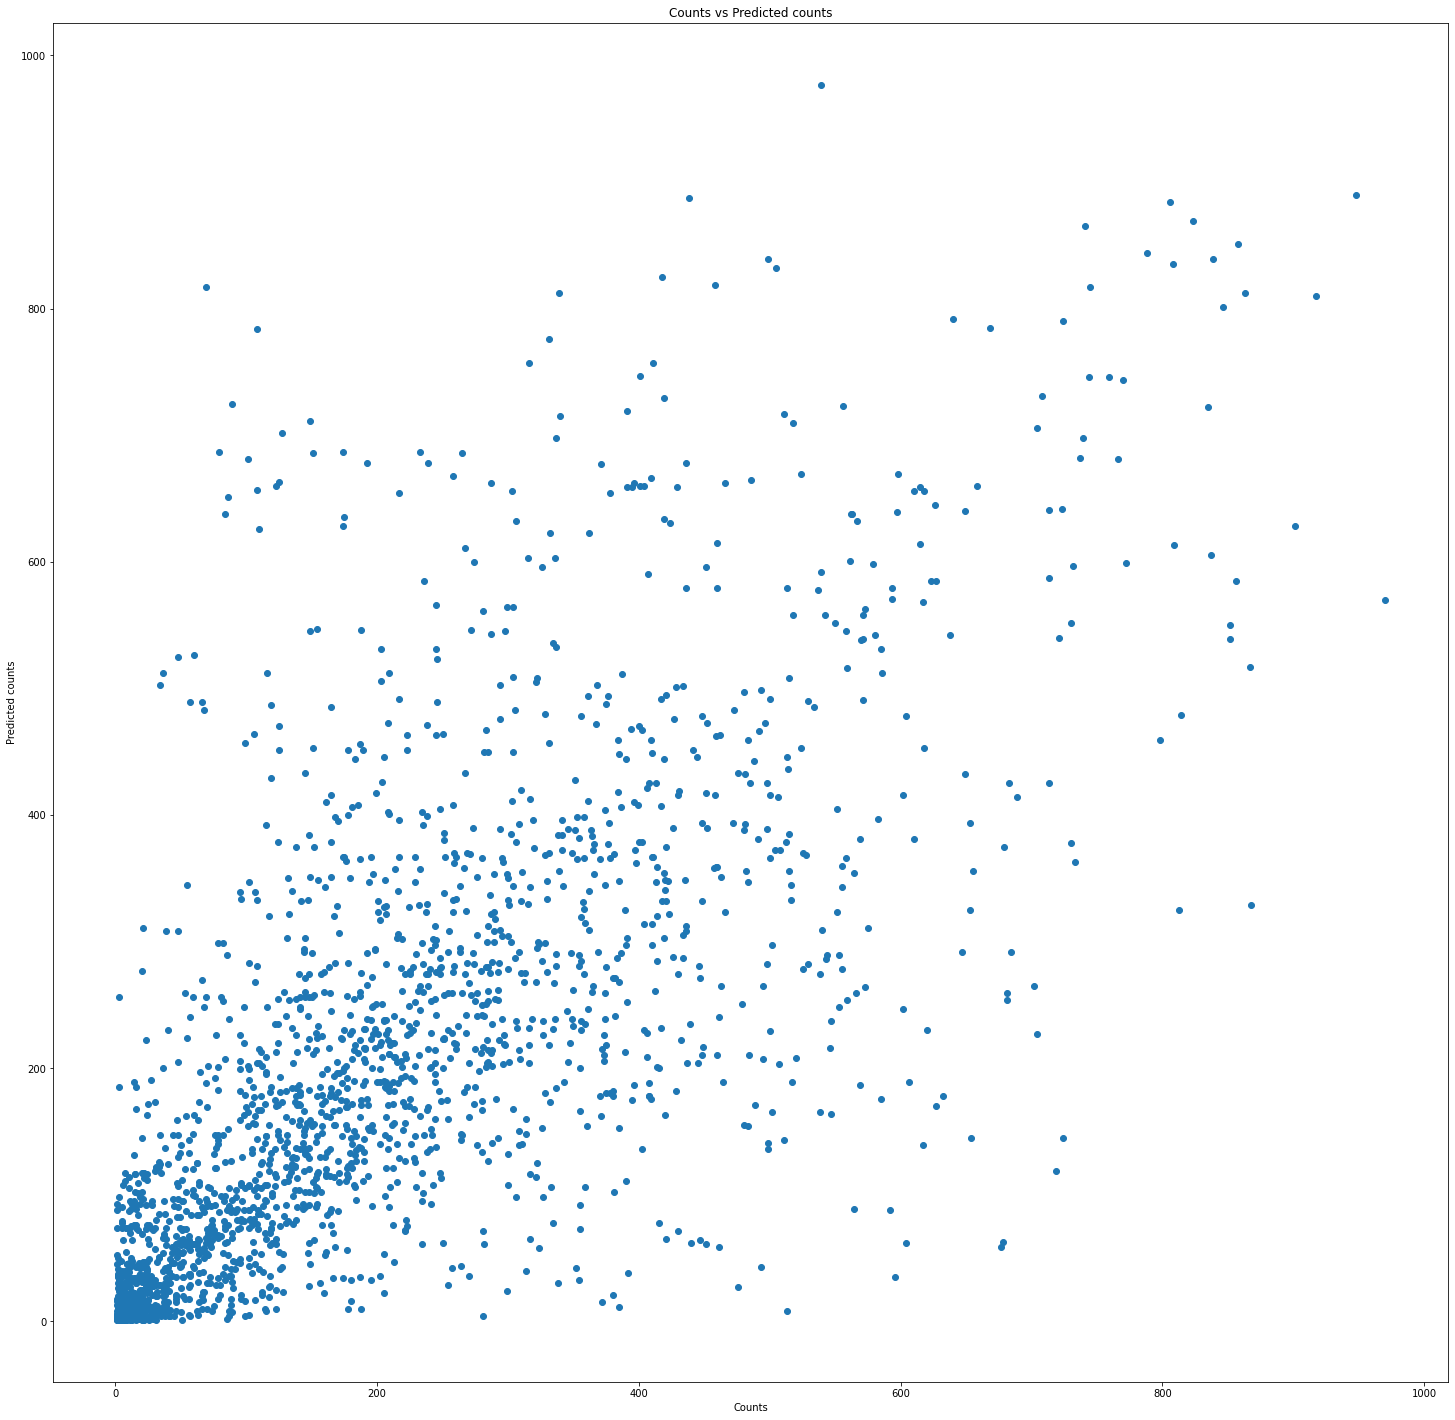

In [294]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [295]:
predictions_dtr=regressor_dtr.predict(X_t)

## Random Forest

In [296]:
from sklearn.ensemble import RandomForestRegressor
regressor_rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor_rfr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=10, random_state=0)

In [297]:
predictions = regressor_rfr.predict(X_test)

In [298]:
print('MAE_rfr_test :'        , metrics.mean_absolute_error(y_test, predictions))  
print('MAE_rfr_train:'        , metrics.mean_absolute_error(y_train, regressor_rfr.predict(X_train))) 

MAE_rfr_test : 70.34244872972145
MAE_rfr_train: 27.030479416847122


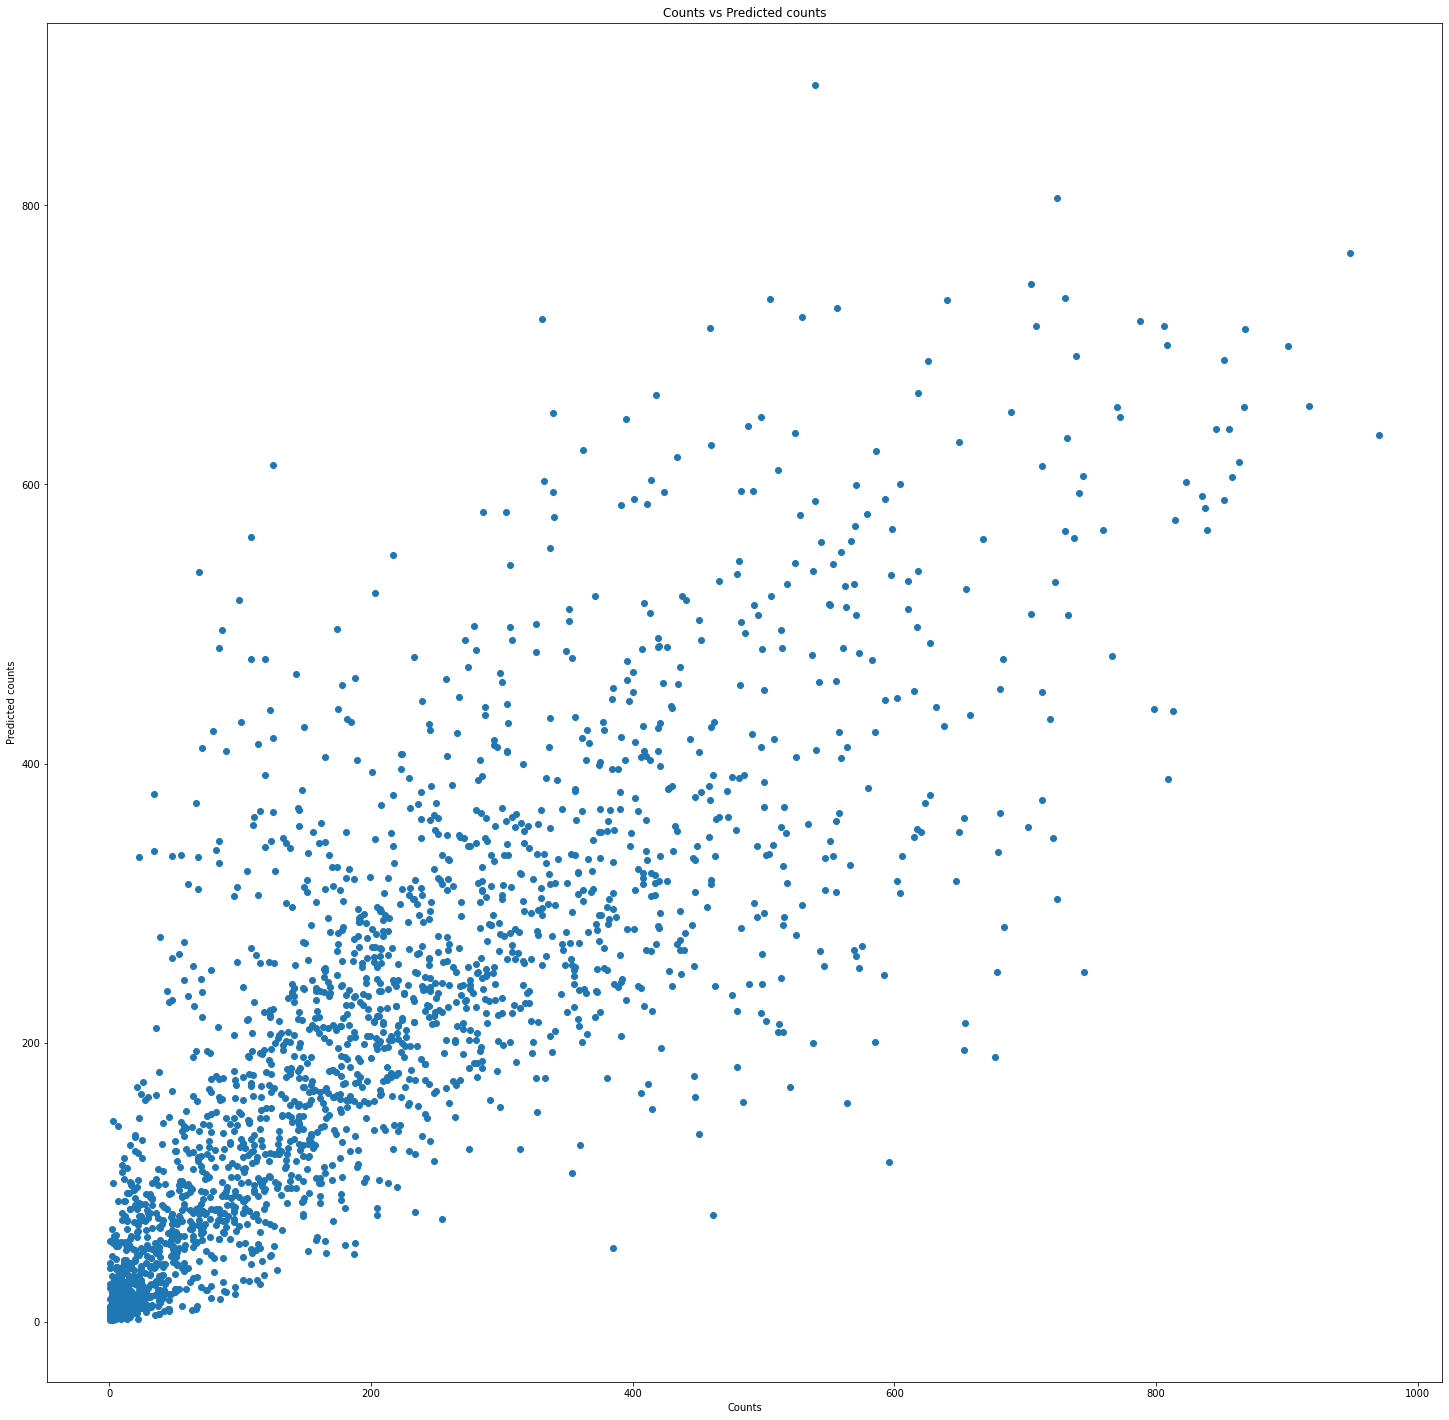

In [299]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

So, The Random Forest has the best performance among all regressors.

In [300]:
predictions_rfr=regressor_rfr.predict(X_t)

## Neural Network

In [301]:
import tensorflow as tf

In [302]:
ann = tf.keras.models.Sequential()

In [303]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='relu'))

In [304]:
ann.compile(optimizer = 'SGD', loss = 'MAE', metrics = ['MAE'])

In [305]:
ann.fit(X_train, y_train, batch_size = 10, epochs = 50)

Epoch 1/50
871/871 [==============================] - 2s 2ms/step - loss: 119.7726 - MAE: 119.7726
Epoch 2/50
871/871 [==============================] - 2s 3ms/step - loss: 96.6057 - MAE: 96.6057
Epoch 3/50
871/871 [==============================] - 2s 2ms/step - loss: 89.8947 - MAE: 89.8947
Epoch 4/50
871/871 [==============================] - 2s 2ms/step - loss: 89.1424 - MAE: 89.1424
Epoch 5/50
871/871 [==============================] - 2s 3ms/step - loss: 88.1278 - MAE: 88.1278
Epoch 6/50
871/871 [==============================] - 2s 2ms/step - loss: 87.8682 - MAE: 87.8682
Epoch 7/50
871/871 [==============================] - 2s 2ms/step - loss: 87.5920 - MAE: 87.5920
Epoch 8/50
871/871 [==============================] - 2s 2ms/step - loss: 87.0291 - MAE: 87.0291
Epoch 9/50
871/871 [==============================] - 2s 2ms/step - loss: 87.0138 - MAE: 87.0138
Epoch 10/50
871/871 [==============================] - 2s 2ms/step - loss: 86.7795 - MAE: 86.7795
Epoch 11/50
871/871 [======

In [306]:
predictions = ann.predict(X_test)

In [307]:
print('MAE_ann_test :'        , metrics.mean_absolute_error(y_test, predictions)) 
print('MAE_ann_train:'        , metrics.mean_absolute_error(y_train, ann.predict(X_train))) 

MAE_ann_test : 95.60384579006963
MAE_ann_train: 91.48515809984124


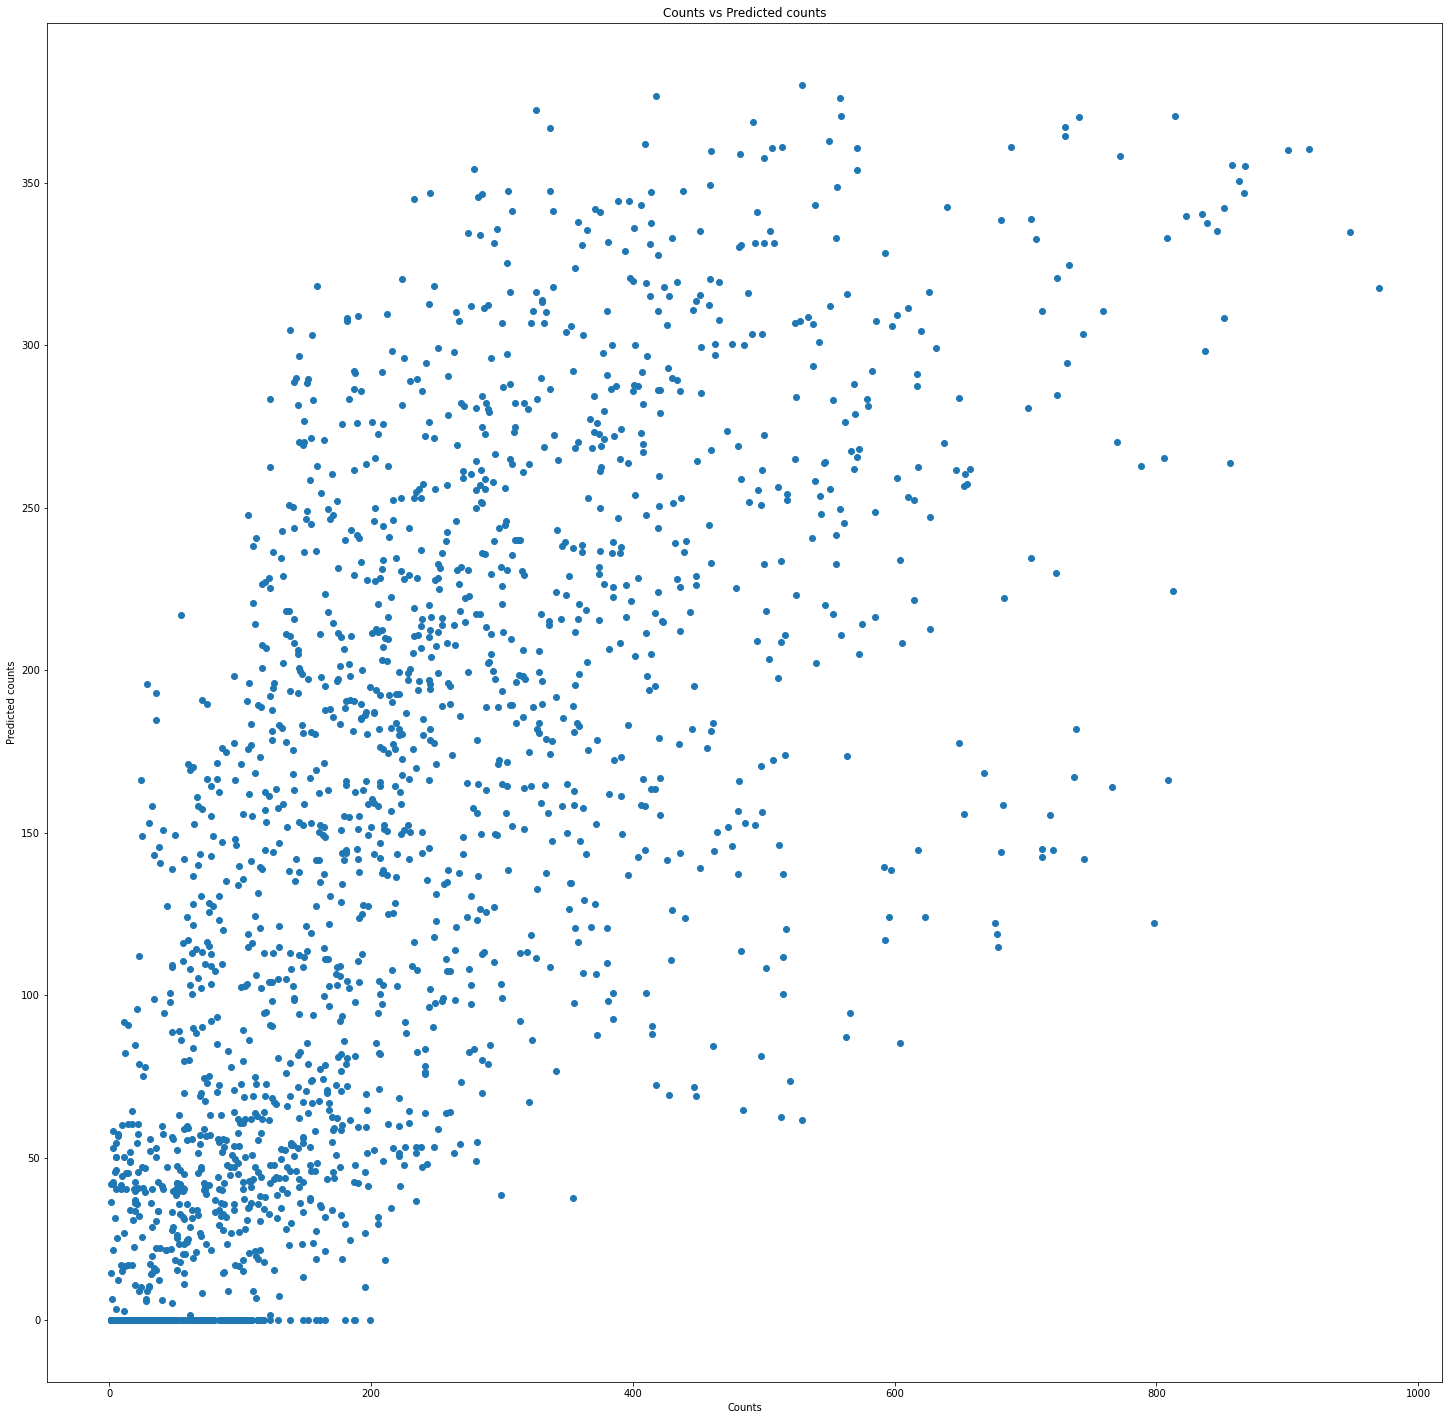

In [308]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [309]:
predictions_ann=ann.predict(X_t)

## XGBoostMethod

In [310]:
import xgboost as xgb

In [311]:
regressor_xgb =  xgb.XGBRegressor()
regressor_xgb.fit(X_train, y_train)

[04:59:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [312]:
predictions = regressor_xgb.predict(X_test)

In [313]:
print('MAE_xgb_ test:'        , metrics.mean_absolute_error(y_test, predictions)) 
print('MAE_xgb_train:'        , metrics.mean_absolute_error(y_train, regressor_xgb.predict(X_train))) 

MAE_xgb_ test: 70.63112421904385
MAE_xgb_train: 67.17613194342813


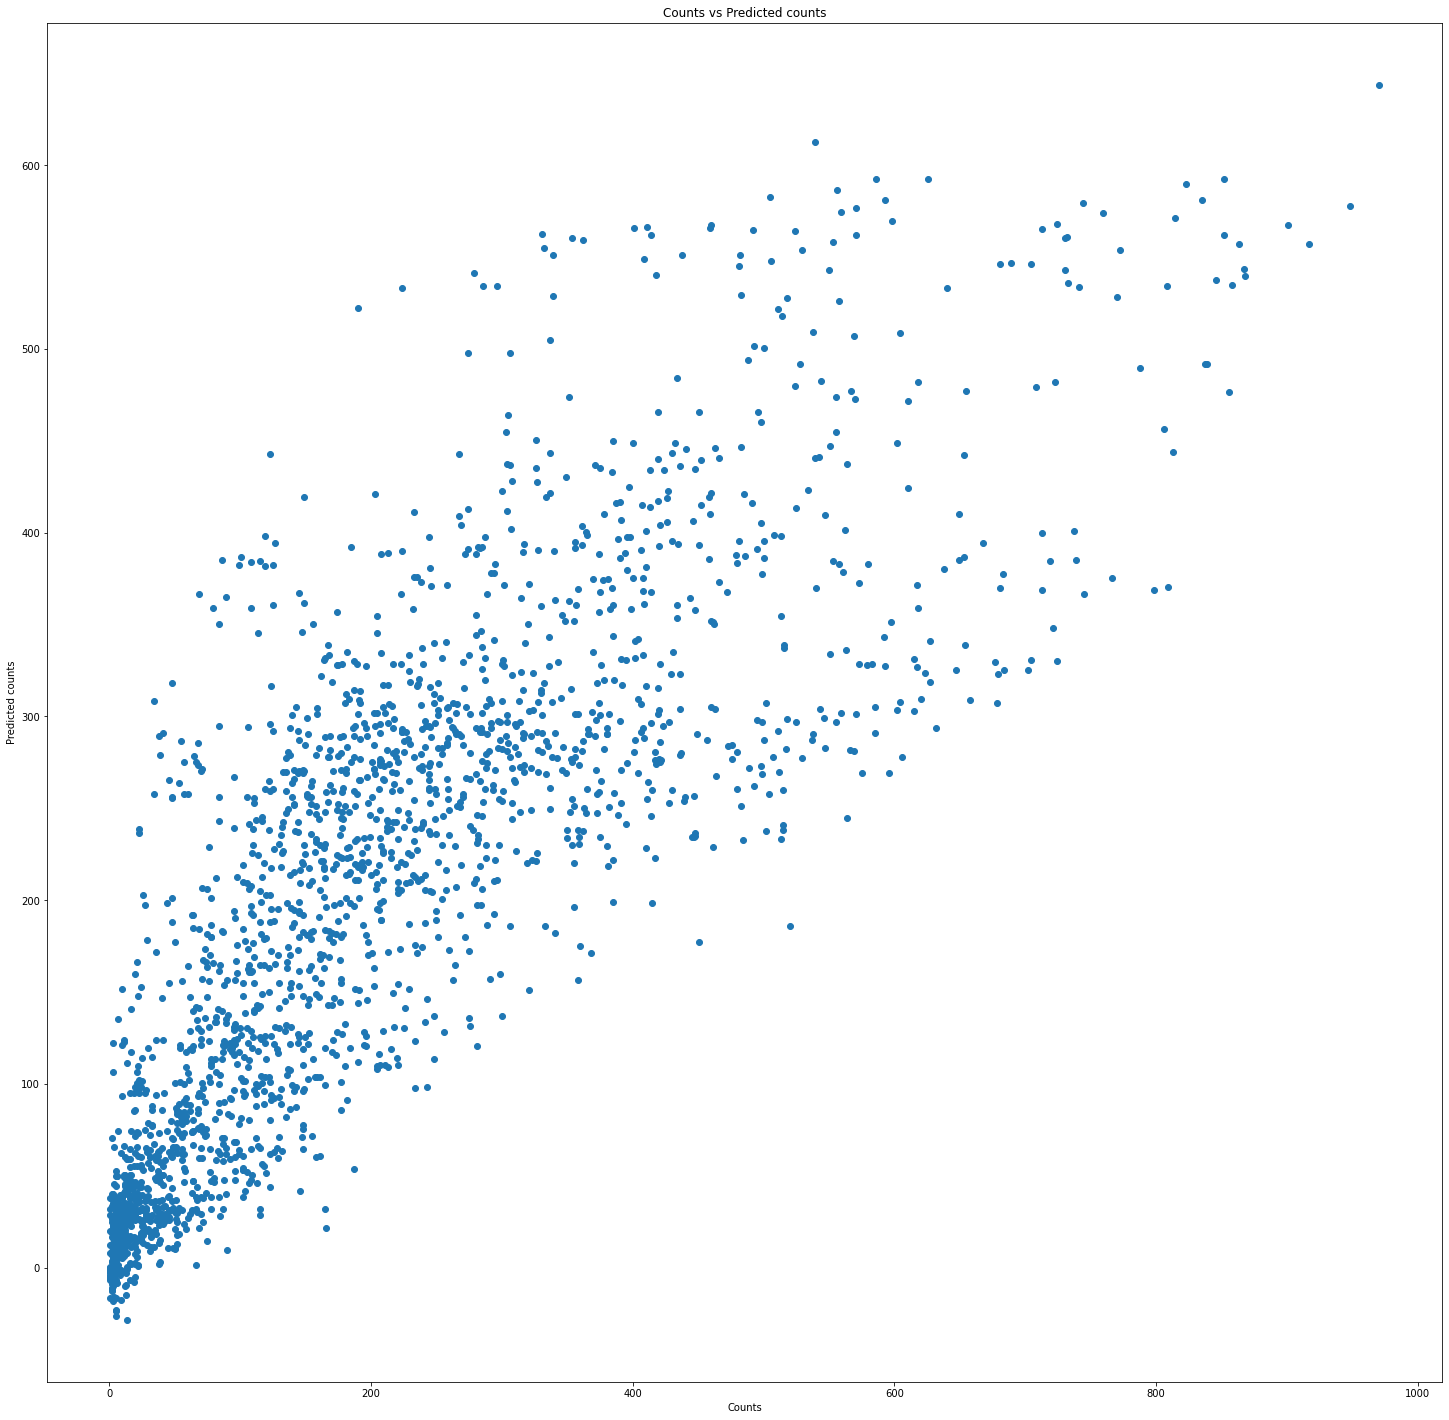

In [314]:
plt.figure(figsize=(25,25))
plt.scatter(y_test, predictions)
plt.xlabel("Counts")
plt.ylabel("Predicted counts")
plt.title("Counts vs Predicted counts")
plt.show()

In [315]:
predictions_xgb=regressor_xgb.predict(X_t)

## Test Result

In [316]:
pd.Series(np.ravel(predictions_mlr))

0        10.814243
1        13.470615
2        21.125826
3        30.895978
4        38.551189
           ...    
6488    224.618000
6489    232.273210
6490    242.710449
6491    259.141443
6492    246.184619
Length: 6493, dtype: float64

In [317]:
result = pd.DataFrame()
result['mlr']=pd.Series(np.ravel(predictions_mlr)).round()
result['knn']=pd.Series(np.ravel(predictions_knn)).round()
result['dtr']=pd.Series(np.ravel(predictions_dtr)).round()
result['rfr']=pd.Series(np.ravel(predictions_rfr)).round()
result['ann']=pd.Series(np.ravel(predictions_ann)).round()
result['xgb']=pd.Series(np.ravel(predictions_xgb)).round()

In [318]:
result

,mlr,knn,dtr,rfr,ann,xgb
0,11.0,2,15.0,32.0,0.0,19.0
1,13.0,4,6.0,12.0,0.0,13.0
2,21.0,4,16.0,14.0,0.0,2.0
3,31.0,1,3.0,8.0,0.0,-5.0
4,39.0,1,1.0,2.0,0.0,-5.0
...,...,...,...,...,...,...
6488,225.0,53,210.0,330.0,97.0,246.0
6489,232.0,53,227.0,202.0,57.0,168.0
6490,243.0,104,191.0,171.0,50.0,154.0
6491,259.0,72,148.0,123.0,47.0,125.0
